<a href="https://colab.research.google.com/github/rtaglega53/pedropicapiedra/blob/master/tarea5_cancer_matriz_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de Patrones
##Dr. Carlos Villaseñor
##Lección 4 - Clasificación (Parte 1)

## Usando los modelos para predecir si un tumor cancerigeno es benigno o maligno

Primeramente vamos a importar la paquetería necesaria

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

## Matriz de Confusión

In [ ]:
y = np.array([0,1,0,1,0,0,1,0,0,1,0,1,1,0,1])
yest = np.array([0,1,0,0,1,0,1,0,0,1,0,1,0,0,1])

print('Confusion Matrix: \n', confusion_matrix(y, yest))
print('Confusion Report: \n', classification_report(y, yest))

Confusion Matrix: 
 [[7 1]
 [2 5]]
Confusion Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7

    accuracy                           0.80        15
   macro avg       0.81      0.79      0.80        15
weighted avg       0.80      0.80      0.80        15



## Curva ROC

AUC:  0.9


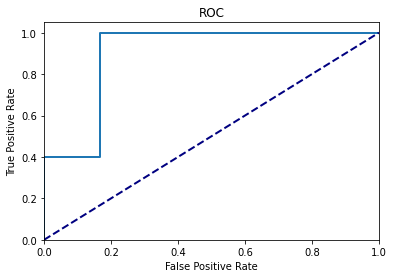

In [ ]:
y = np.array([0,0,0,0,0,0,1,1,1,1,1])
y_prob = np.array([0.000001,0.015,0.025,0.08,0.23,0.95,0.39,0.79,0.91,0.98,0.9998])

fpr, tpr, thresholds = roc_curve(y, y_prob)
print('AUC: ', roc_auc_score(y, y_prob))

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Clasificación de tumores cancerigenos

Ahora vamos a leer los datos

In [ ]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Seleccionamos las variables

In [ ]:
df = pd.read_csv('diabetes.csv')
x = np.asanyarray(df.drop(columns=['Outcome']))
y = np.asanyarray(df[['Outcome']])
print(x.shape, y.shape)

(768, 8) (768, 1)


Hacemos la separación de los datos

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

Creamos el modelo y entrenamos

Train:  0.6493055555555556
Test:  0.6354166666666666
Classification Train-Set Report: 
               precision    recall  f1-score   support

           0       0.82      0.58      0.68       368
           1       0.51      0.77      0.61       208

    accuracy                           0.65       576
   macro avg       0.66      0.68      0.65       576
weighted avg       0.71      0.65      0.66       576

Classification Test-Set Report: 
               precision    recall  f1-score   support

           0       0.85      0.57      0.68       132
           1       0.45      0.78      0.57        60

    accuracy                           0.64       192
   macro avg       0.65      0.68      0.63       192
weighted avg       0.73      0.64      0.65       192



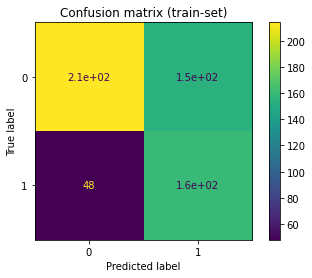

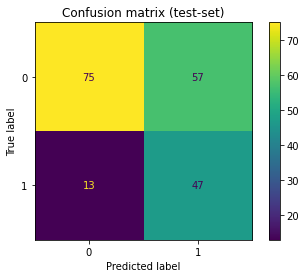

In [ ]:
model = Pipeline([('scaler', StandardScaler()),
                  ('classifier', Perceptron())])

model.fit(xtrain, ytrain.ravel())  # que es ytrain.ravel()  ??

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

plot_confusion_matrix(model, xtrain, ytrain)
plt.title('Confusion matrix (train-set)')

plot_confusion_matrix(model, xtest, ytest)
plt.title('Confusion matrix (test-set)')

print('Classification Train-Set Report: \n', 
      classification_report(ytrain, model.predict(xtrain)))

print('Classification Test-Set Report: \n', 
      classification_report(ytest, model.predict(xtest)))

Train:  0.7708333333333334
Test:  0.796875
Classification Train-Set Report: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       368
           1       0.73      0.58      0.65       208

    accuracy                           0.77       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.77      0.76       576

Classification Test-Set Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       132
           1       0.72      0.57      0.64        60

    accuracy                           0.80       192
   macro avg       0.77      0.73      0.75       192
weighted avg       0.79      0.80      0.79       192



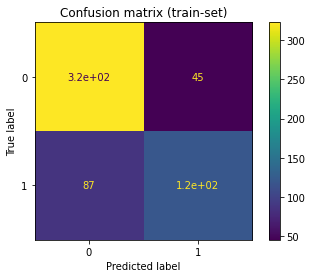

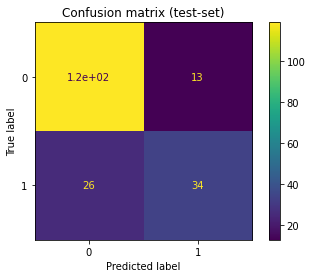

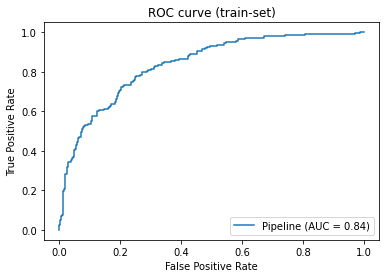

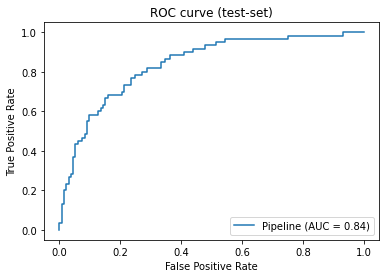

In [ ]:
model = Pipeline([('scaler', StandardScaler()),
                  ('classifier', LogisticRegression())])

model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

plot_confusion_matrix(model, xtrain, ytrain)
plt.title('Confusion matrix (train-set)')

plot_confusion_matrix(model, xtest, ytest)
plt.title('Confusion matrix (test-set)')

plot_roc_curve(model,xtrain, ytrain)
plt.title('ROC curve (train-set)')

plot_roc_curve(model,xtest, ytest)
plt.title('ROC curve (test-set)')


print('Classification Train-Set Report: \n', 
      classification_report(ytrain, model.predict(xtrain)))

print('Classification Test-Set Report: \n', 
      classification_report(ytest, model.predict(xtest)))